## 聚類分析: 多筆資料分類為幾個類似群體
具體來說是市場的行銷手法，用於對客戶做區別（客戶分類）、定標（鎖定對象）

## 主成分分析: 變數較多降維的方法

## 購物籃分析: 商品組合 發生情況

In [1]:
# 資料加工、處理、分析函式庫
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd


#視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#machine-learning library
import sklearn 

%precision 3

'%.3f'

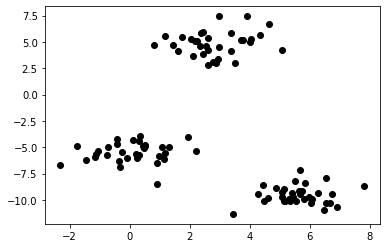

In [2]:
#import kmeans 
from sklearn.cluster import KMeans

#import datas
from sklearn.datasets import make_blobs

#Generate example data
X, _ = make_blobs(random_state = 10)

#描繪圖形 能以color參數來著色
plt.scatter(X[:,0],X[:,1],color = 'black')

In [3]:
# Kmeans 類別初始化
kmeans = KMeans(init='random',n_clusters=3)

# 計算群體重心
kmeans.fit(X)

# 預測群體編號
y_pred = kmeans.predict(X)

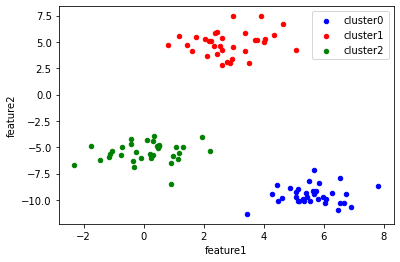

In [4]:
# 以concat 來橫向結合資料（指定axis = 1）
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 對於上述問題, 將 x 軸標籤
merge_data.columns = ['feature1', 'feature2', 'cluster']

# 聚類圖形化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x ='feature1', y='feature2', color = colors[i], label=f'cluster{i}',ax=ax)

In [5]:
import requests, zipfile 
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip' 

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [6]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
print('資料的形式(X,y):{}'.format(bank.shape))
print('遺漏資料的數量:{}'.format(bank.isnull().sum().sum()))

資料的形式(X,y):(45211, 17)
遺漏資料的數量:0


In [8]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age','balance','campaign','previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

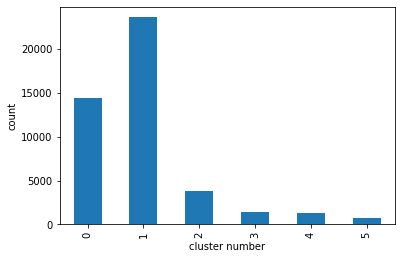

In [9]:
# KMeans類別初始化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_, name='cluster_number')

print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

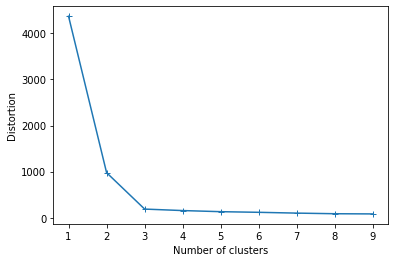

In [10]:
# elbow method (base on SSE)
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
# 顯示圖形
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

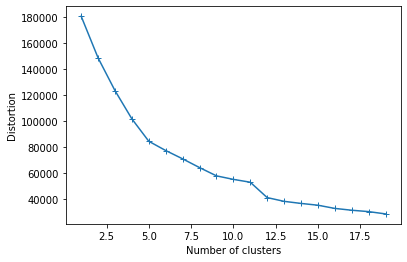

In [11]:
# elbow method
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
# 顯示圖形
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

### 聚類分析解釋 

In [12]:
bank_with_cluster = pd.concat([bank, labels], axis=1)

bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [13]:
# 分割區隔
bins =[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]

# qcut_age變數設定年齡層
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# 結合群體編號與年齡層
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3475,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,170,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [14]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

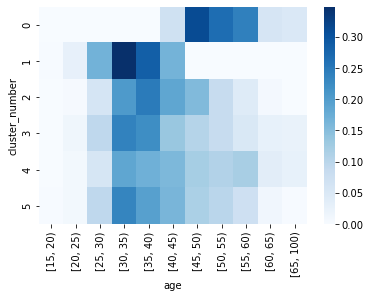

In [15]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [16]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,528,651,2723,2005,476,1072,3,2048,432,154
1,3005,5385,698,409,4932,55,820,2474,812,4256,687,75
2,392,862,146,108,896,60,139,371,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

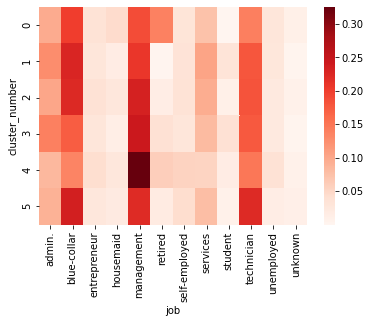

In [17]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')

# 主成分分析

相關係數:0.889


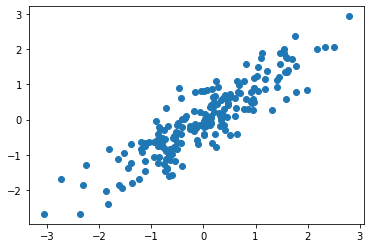

In [18]:
from sklearn.preprocessing import StandardScaler

# 製作RandomState物件
sample=np.random.RandomState(1)

# 生成2個亂數
X = np.dot(sample.rand(2, 2),sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 計算相關係數與圖形化
print('相關係數:{:.3f}'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

機器學習是希望用PCA達到dimension reduction的目的

主要是避免 Hughes 現象(Hughes Phenomenon) / 維度詛咒(curse of dimensionality)

In [19]:
from sklearn.decomposition import PCA

# 主成分分析
pca =PCA(n_components=2)   #上面生成2個亂數 所以這邊n =2
pca.fit(X_std)

PCA(n_components=2)

In [20]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


## PCA example

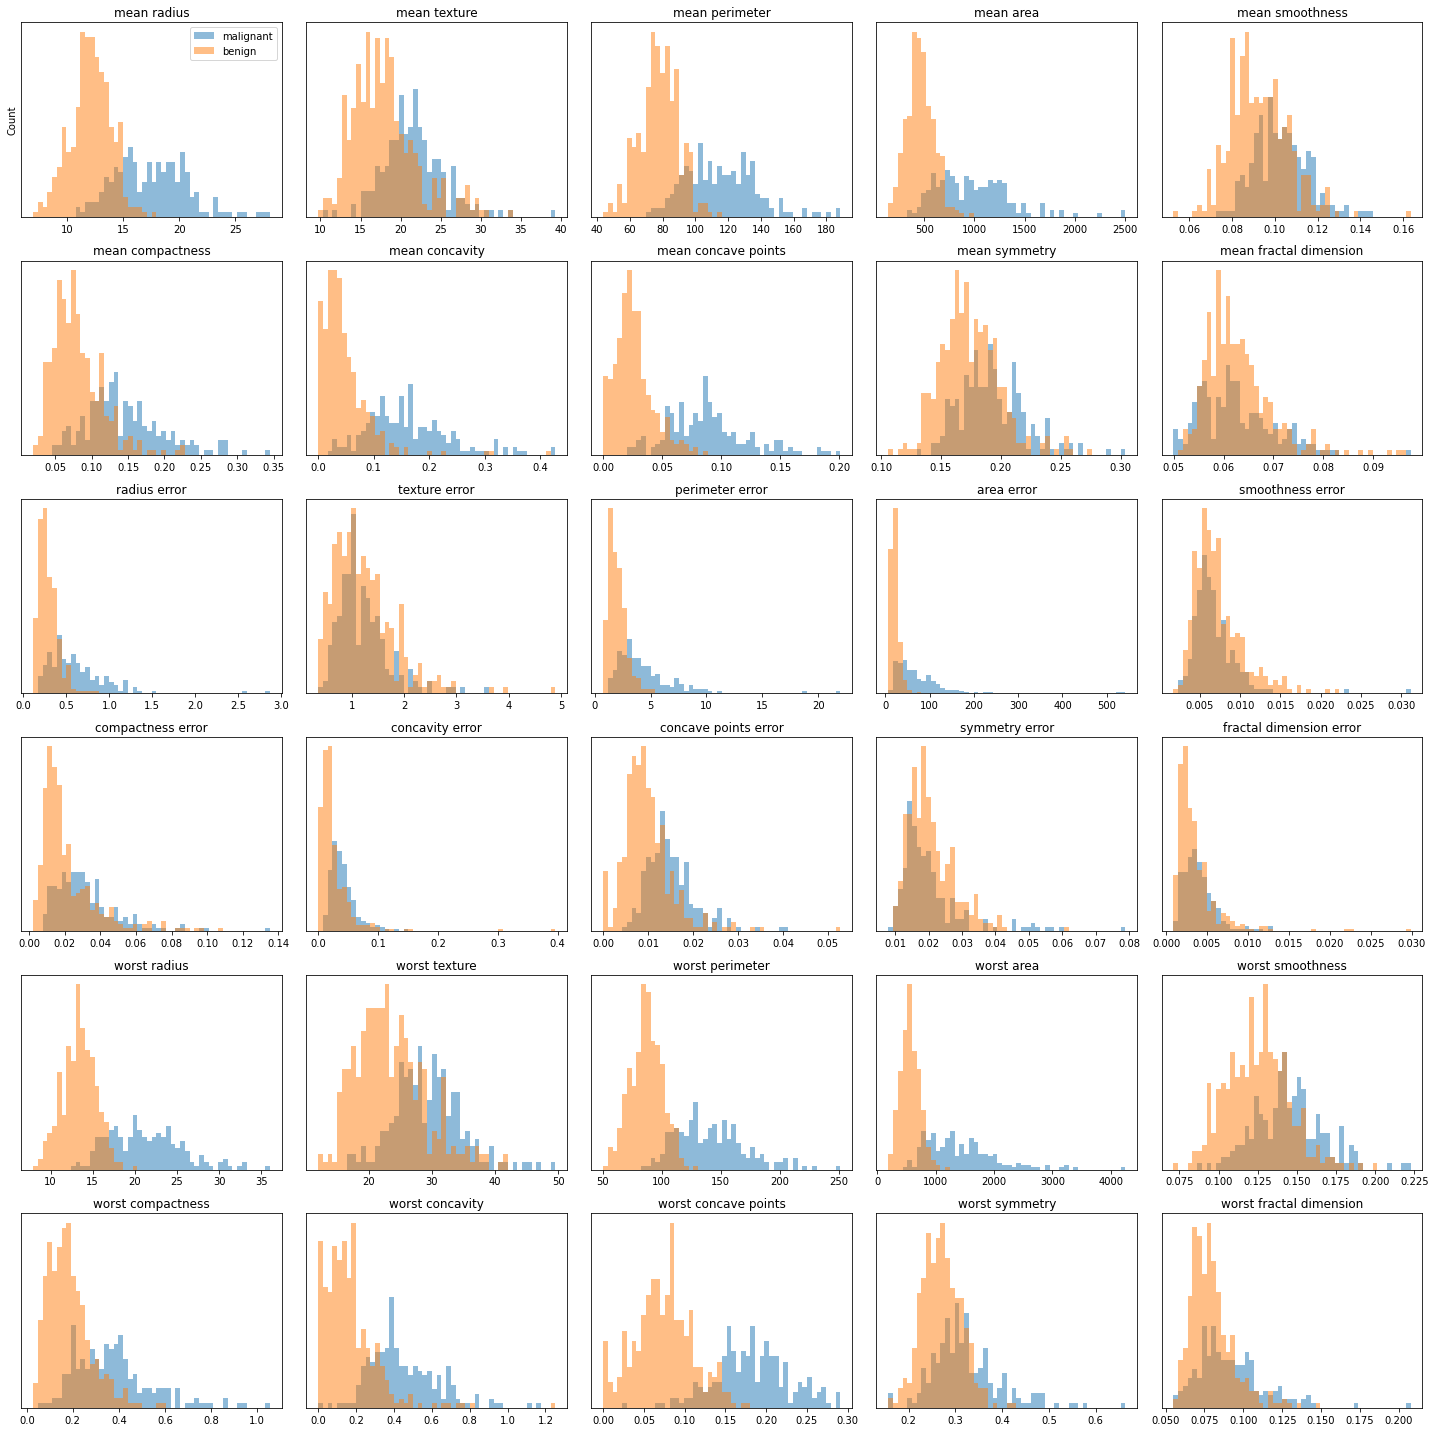

In [21]:
# import data of breast cancer
from sklearn.datasets import load_breast_cancer

# load data
cancer = load_breast_cancer()

# malignant, benign 過濾
# malignant cancer.target = 0
malignant = cancer.data[cancer.target==0]

# malignant cancer.target = 1
benign = cancer.data[cancer.target==1]

fig, axes = plt.subplots(6, 5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha = .5)
    ax[i].hist(benign[:,i], bins, alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# set labels
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'], loc='best')
fig.tight_layout()

In [25]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成份分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 顯示
print('X_pca sape:{}'.format(X_pca.shape))
print('Expained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca sape:(569, 2)
Expained variance ratio:[0.443 0.19 ]


In [28]:
# 對行附加標籤,第1個為第一主成分,第2個為第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 對上述資料附加目標變數(cancer.target),在橫向結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis =1)

# 分良性、惡性
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

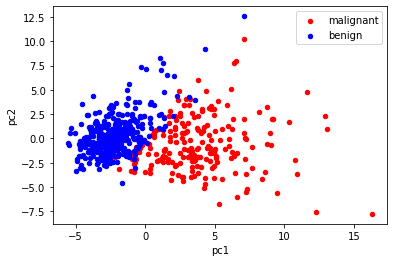

In [30]:
#描繪惡性
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')

#描繪良性
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)